## Bayesian Optimization for hyper-parameter tuning with Gaussian Processes 

In [97]:
import GPy
import GPyOpt
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import cross_val_score

dataset = datasets.load_diabetes()
X = dataset['data']
y = dataset['target']

## With XG boost regressor

In [98]:
from xgboost import XGBRegressor

# Optimizer will try to find minimum, so let's add a "-" sign.
def f1(parameters):
    parameters = parameters[0]
    score = -cross_val_score(
        XGBRegressor(learning_rate=parameters[0],
                     max_depth=int(parameters[2]),
                     n_estimators=int(parameters[3]),
                     gamma=int(parameters[1]),
                     min_child_weight = parameters[4]), 
        X, y, scoring='neg_root_mean_squared_error'
    ).mean()
    score = np.array(score)
    return score

# Bounds (define continuous variables first, then discrete!)
bounds = [
    {'name': 'learning_rate',
     'type': 'continuous',
     'domain': (0, 1)},
    {'name': 'gamma',
     'type': 'continuous',
     'domain': (0, 5)},
    {'name': 'max_depth',
     'type': 'discrete',
     'domain': (1, 50)},
    {'name': 'n_estimators',
     'type': 'discrete',
     'domain': (1, 300)},
    {'name': 'min_child_weight',
     'type': 'discrete',
     'domain': (1, 10)}
]

In [99]:
baseline = -cross_val_score(
    XGBRegressor(), X, y, scoring='neg_root_mean_squared_error'
).mean()
baseline
# 64.90693011829266

64.90693033120199

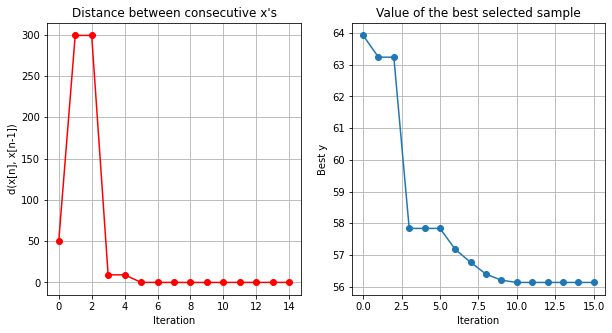

In [100]:

optimizer = GPyOpt.methods.BayesianOptimization(
    f=f1, domain=bounds,
    acquisition_type ='MPI',
    acquisition_par = 0.1,
    exact_eval=True
)
max_iter = 50
max_time = 60
optimizer.run_optimization(max_iter, max_time)
optimizer.plot_convergence()

In [101]:
optimizer.X[np.argmin(optimizer.Y)]
print('RMSE:', np.min(optimizer.Y),
      'Gain:', baseline/np.min(optimizer.Y)*100)
# RMSE: 57.6844355488563 Gain: 112.52069904249859

RMSE: 56.13434656933491 Gain: 115.62783625000701


## with Random Forest Regressor

In [102]:
from sklearn.ensemble import RandomForestRegressor

baseline = -cross_val_score(
    RandomForestRegressor(), X, y, scoring='neg_root_mean_squared_error'
).mean()
baseline

58.239797654252165

In [103]:
# Optimizer will try to find minimum, so let's add a "-" sign.
def f_rf(parameters):
    parameters = parameters[0]
    score = -cross_val_score(
        RandomForestRegressor(max_depth=int(parameters[0]),
                     n_estimators=int(parameters[1]), 
                     min_samples_leaf=int(parameters[2])), 
        X, y, scoring='neg_root_mean_squared_error'
    ).mean()
    score = np.array(score)
    return score

# Bounds (define continuous variables first, then discrete!)
bounds_rf = [
    {'name': 'max_depth',
     'type': 'discrete',
     'domain': (1, 60)},
    {'name': 'n_estimators',
     'type': 'discrete',
     'domain': (1, 300)},
    {'name': 'min_samples_leaf',
     'type': 'discrete',
     'domain': (1, 10)}
]

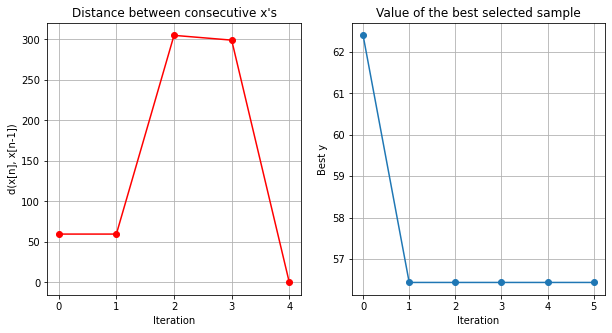

In [104]:
optimizer_rf = GPyOpt.methods.BayesianOptimization(
    f=f_rf, domain=bounds_rf,
    acquisition_type ='MPI',
    acquisition_par = 0.1,
    exact_eval=True
)
max_iter = 60
max_time = 60
optimizer_rf.run_optimization(max_iter, max_time)
optimizer_rf.plot_convergence()

In [105]:
optimizer_rf.X[np.argmin(optimizer.Y)]
print('RMSE:', np.min(optimizer.Y),
      'Gain:', baseline/np.min(optimizer.Y)*100)
# RMSE: 57.6844355488563 Gain: 112.52069904249859

IndexError: index 10 is out of bounds for axis 0 with size 6

## With Support Vector Regressor

In [106]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

baseline = -cross_val_score(
    SVR(), X, y, scoring='neg_root_mean_squared_error'
).mean()
baseline

70.44352670586173

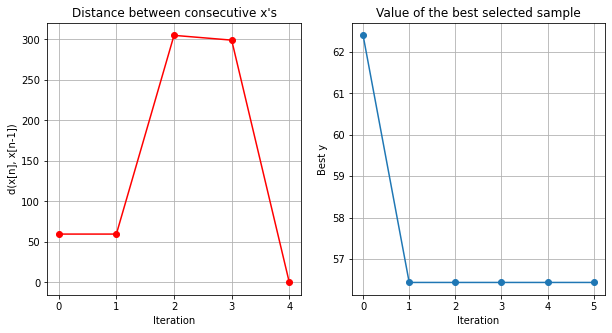

In [107]:
# Optimizer will try to find minimum, so let's add a "-" sign.
def f_svr(parameters):
    parameters = parameters[0]
    score = -cross_val_score(
        SVR(C=float(parameters[0]), gamma=float(parameters[1])), 
        X, y, scoring='neg_root_mean_squared_error'
    ).mean()
    score = np.array(score)
    return score

# Bounds (define continuous variables first, then discrete!)
bounds_svr = [
    {'name': 'C',
     'type': 'continuous',
     'domain': (0, 1000)},
    {'name': 'gamma',
     'type': 'continuous',
     'domain': (0, 1000)}
]

optimizer_svr = GPyOpt.methods.BayesianOptimization(
    f=f_svr, domain=bounds_rf,
    acquisition_type ='MPI',
    acquisition_par = 0.1,
    exact_eval=True
)
max_iter = 60
max_time = 60
optimizer_rf.run_optimization(max_iter, max_time)
optimizer_rf.plot_convergence()

In [ ]:
optimizer_svr.X[np.argmin(optimizer.Y)]
print('RMSE:', np.min(optimizer.Y),
      'Gain:', baseline/np.min(optimizer.Y)*100)